![](image\movie2.png)

In the era of information overloaded, it is very difficult for users to get information that they are really interested in. It is very hard for the content provider to make their content stand out from the crowd.
Have you ever wondered how Netflix or Hotstar recommends new movies? These suggestions or recommendations are done by a system called a recommendation system. We tend to watch similar content on YouTube or similar movie on Netflix. Recommender system suggest/ recommend the movie, content, product by learning and understanding the pattern in user’s watch history or buy history, and then applies those learning to make new suggestions to watch/buy; that is known as ‘Recommendation’.

The goal of this project is to generate meaningful movie recommendation to the user that they are really interested in.
Many researchers raised a lot of different recommendation approaches. The most famous category of these approaches is:
• Content-based Recommendation. 
• Collaborative-filtering Recommendation. 
• Hybrid Recommendation.

Content-based recommendation is an important approach in recommender systems. The basic idea is to recommend items that are similar with what user liked before.Here, I used Content based approach to recommend movies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#The Movie Database (TMDB) is a community-built movie and TV database, and this contains two datasets.
#This is taken from Kaggle- https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

credit_df = pd.read_csv('tmdb_5000_credits.csv')
movie_df=pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credit_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [6]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Credit dataframe contains Movie id, Title, Cast and Crew. Cast and crew is in form of list of dictionaries, and Movie dataframe contains 20 columns. We combined these 2 dataframes and new dataframe, merged has 4809 rows and 23 columns

In [7]:
credit_df.head(1)['cast'].values

array(['[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "ge

In [8]:
credit_df.head(1)['crew'].values

array(['[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cam

In [9]:
#merging both dataframes
merged=movie_df.merge(credit_df, on='title')

In [10]:
merged.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
movie_df.shape

(4803, 20)

In [12]:
credit_df.shape

(4803, 4)

In [13]:
merged.shape

(4809, 23)

In [14]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

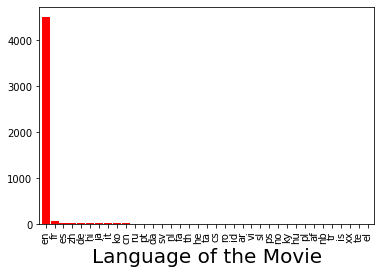

In [15]:
# considering language is not suggested as we have most of the movies in English
merged['original_language'].value_counts().plot(kind='bar', width= 0.9, color='r')
plt.xlabel('Language of the Movie', size=20)
plt.show()

# Pre-processing 

In [16]:
#We will consider overview, genres, keywords, cast and crew to creat tags.
df_content = merged[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]
df_content.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [17]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.6+ KB


In [18]:
#As we have only 3 null values, we are droping it
df_content.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [19]:
df_content.dropna(inplace=True)

C:\Users\rutvi\AppData\Local\Temp/ipykernel_14508/1836689038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content.dropna(inplace=True)


In [20]:
#No nan value
df_content.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [21]:
#No duplicate value
df_content.duplicated().sum()

0

In [22]:
#A movie falls into more than one genres
df_content.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [23]:
#Keywords are words attached to a movie to describe concept, style or action that takes place during a title.
#Keywords are in form of 'list of dictionary', where first object is 'id' and second is what we want -'name', 
df_content.iloc[0].keywords

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [24]:
#The actors in a movie, are in form of 'list of dictionary'
#from this all information, we are going to fetch only top 3 actors (main actors)
df_content.iloc[0].cast

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [25]:
#crew is a group of people, hired by a production company, for the purpose of producing a film or motion picture.
#main crew from all this list is Director, we want only name of the director from this 'list of dictionary'
df_content.iloc[0].crew

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [26]:
#ast module helps to traverse a list from string '[]' --> [] (it convert string to list)
import ast

In [27]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [28]:
# fetching all names of genres and keywords.

df_content['genres']=df_content['genres'].apply(convert)
df_content['keywords']=df_content['keywords'].apply(convert)

C:\Users\rutvi\AppData\Local\Temp/ipykernel_14508/2186455785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content['genres']=df_content['genres'].apply(convert)
C:\Users\rutvi\AppData\Local\Temp/ipykernel_14508/2186455785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content['keywords']=df_content['keywords'].apply(convert)


In [29]:
def convert_top3(text):
    L = []
    counter = 0
    
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter += 1
    return L

In [30]:
#fetching only top3 cast from the list

df_content['cast']=df_content['cast'].apply(convert_top3)

C:\Users\rutvi\AppData\Local\Temp/ipykernel_14508/1920705479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content['cast']=df_content['cast'].apply(convert_top3)


In [31]:
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [32]:
#Fetching only name of the director from this list 

df_content['crew']=df_content['crew'].apply(fetch_director)

C:\Users\rutvi\AppData\Local\Temp/ipykernel_14508/1389254135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content['crew']=df_content['crew'].apply(fetch_director)


In [33]:
df_content.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [34]:
df_content.overview[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [35]:
#Splitting every word of the overview of Movie

df_content['overview'] = df_content['overview'].apply(lambda x:x.split())

C:\Users\rutvi\AppData\Local\Temp/ipykernel_14508/222900033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content['overview'] = df_content['overview'].apply(lambda x:x.split())


In [36]:
df_content.overview[0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [37]:
#We have some common name in our data, check Sam in crew and cast.
#We have to combine first and last name (removing space between them) in order to create tags.

df_content['genres']=df_content['genres'].apply(lambda x:[i.replace(" ", "") for i in x])
df_content['keywords']=df_content['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])
df_content['cast']=df_content['cast'].apply(lambda x:[i.replace(" ", "") for i in x])
df_content['crew']=df_content['crew'].apply(lambda x:[i.replace(" ", "") for i in x])

C:\Users\rutvi\AppData\Local\Temp/ipykernel_14508/4230042768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content['genres']=df_content['genres'].apply(lambda x:[i.replace(" ", "") for i in x])
C:\Users\rutvi\AppData\Local\Temp/ipykernel_14508/4230042768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content['keywords']=df_content['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])
C:\Users\rutvi\AppData\Local\Temp/ipykernel_14508/4230042768.py:6: SettingWithCopyWarning: 
A value is

In [38]:
df_content.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [39]:
#Now we are ready to create Documents(tags). For that, we combined ‘genres’, ‘keywords’, ‘cast’ and ‘crew’ features.
df_content['tags'] = df_content['overview'] + df_content['genres'] + df_content['keywords']
+ df_content['cast'] + df_content['crew']

C:\Users\rutvi\AppData\Local\Temp/ipykernel_14508/1030851745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content['tags'] = df_content['overview'] + df_content['genres'] + df_content['keywords']


0       [SamWorthington, ZoeSaldana, SigourneyWeaver, ...
1       [JohnnyDepp, OrlandoBloom, KeiraKnightley, Gor...
2       [DanielCraig, ChristophWaltz, LéaSeydoux, SamM...
3       [ChristianBale, MichaelCaine, GaryOldman, Chri...
4       [TaylorKitsch, LynnCollins, SamanthaMorton, An...
                              ...                        
4804    [CarlosGallardo, JaimedeHoyos, PeterMarquardt,...
4805    [EdwardBurns, KerryBishé, MarshaDietlein, Edwa...
4806    [EricMabius, KristinBooth, CrystalLowe, ScottS...
4807    [DanielHenney, ElizaCoupe, BillPaxton, DanielH...
4808    [DrewBarrymore, BrianHerzlinger, CoreyFeldman,...
Length: 4806, dtype: object

In [40]:
#We only need movie_id, title and tags!
movie_content = df_content[['movie_id', 'title', 'tags']]

In [41]:
movie_content.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [42]:
movie_content['tags'] = movie_content['tags'].apply(lambda x: " ".join(x))

C:\Users\rutvi\AppData\Local\Temp/ipykernel_14508/1764384700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_content['tags'] = movie_content['tags'].apply(lambda x: " ".join(x))


In [43]:
#Removing list
movie_content.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [44]:
movie_content['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

#  Feature Extraction from Text (Text Vectorization)

For Natural Language Processing (NLP) to work, it always requires transforming natural language (text and audio) into numerical form. Text vectorization techniques namely Bag of Words and TF-IDF vectorization, which are very popular choices for traditional machine learning algorithms can help in converting text to numeric feature vectors.

TF-IDF is better text vectorization technique because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

Let's say a document (D1) has 3 text (T1, T2, T3).
T1 is present in a perticular document D1, but very rare in the whole corpus then T1 is very important to document (D1). and T1 got high weight compare to other text (T2 and T3) in the document.

Term frequency is about how many times a term i appears in document j , which can be represented by TF(ij ). In the condition of removing stop-words, the more i appears in the document, the more important term i is for the document.  Inverse document frequency (IDF) shows how frequently a keyword is used within a collection of documents.
TF X IDF will give the final score/final weight.

![](image\TFIDF.png)

In [45]:
#Text vectorization using TF-IDF ('Term Frequency’ and ‘Inverse Document Frequency’) from sklearn, feature extraction module.
#We are extracting 5000 most occuring features, removing English stop words and converting the features in lowercase. 

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', lowercase=True)

In [46]:
vectors = tfidf.fit_transform(movie_content['tags']).toarray()

In [47]:
#5000 most occouring feature names

tfidf.get_feature_names()

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '150',
 '16',
 '17',
 '17th',
 '18',
 '18th',
 '18thcentury',
 '19',
 '1930s',
 '1940s',
 '1944',
 '1950',
 '1950s',
 '1955',
 '1959',
 '1960',
 '1960s',
 '1965',
 '1967',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1974',
 '1976',
 '1980',
 '1980s',
 '1985',
 '1990s',
 '1999',
 '19th',
 '19thcentury',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '60s',
 '70',
 '70s',
 'aaron',
 'abandoned',
 'abducted',
 'abilities',
 'ability',
 'able',
 'aboard',
 'abuse',
 'abusive',
 'academic',
 'academy',
 'accept',
 'accepted',
 'accepts',
 'access',
 'accident',
 'accidental',
 'accidentally',
 'accompanied',
 'accomplish',
 'account',
 'accountant',
 'accused',
 'ace',
 'achieve',
 'act',
 'acting',
 'action',
 'actionhero',
 'actions',
 'activist',
 'activities',
 'activity',
 'actor',
 'actors',
 'actress',
 'acts',
 'actual',
 'actually',
 'adam',
 'a

By applying TF-IDF parameters to corpus, we got our 5000 features. But, consider words, “abilities and ability”, “abuse and abusive”, “accept, accepted, and accepts” etc. They all can be reduced to the same word “ability, abuse, accept”. After all, all these convey the same meaning. This helps reduce complexity while retaining the essence of meaning carried by these words. Stemming is the process of reducing words like these to its stem or root format.

Common Terms:
Corpus(C): Collection of all text (here, tags). A text can be repeat here.
Vocabulary(V): Unique words in Corpus.
Document(D): Here, a document is tag. As we have 4803 movies and each movie has different tag, we have total 4803 documents.
Word(W) : Individual text in every document.

### Stemming

![](image\stemlem.png)

In [48]:
# Here, we are performing natural language processing technique (Stemming) that lowers inflection in words to their root forms

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [49]:
def stem(text):
    y = []
    
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [50]:
movie_content['tags'] = movie_content['tags'].apply(stem)

C:\Users\rutvi\AppData\Local\Temp/ipykernel_14508/1693860640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_content['tags'] = movie_content['tags'].apply(stem)


In [51]:
movie_content['tags']

0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play hi guitar and ca...
4805    a newlyw couple' honeymoon is upend by the arr...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: tags, Length: 4806, dtype: object

In [52]:
tfidf_stem = TfidfVectorizer(max_features=5000, stop_words='english')

In [53]:
vectors_stem = tfidf_stem.fit_transform(movie_content['tags']).toarray()

In [54]:
vectors_stem

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

![](image\vector.png)

In [55]:
vectors_stem.shape

(4806, 5000)

In [56]:
# Finally, we got highest occurring 5000 words.
tfidf_stem.get_feature_names()

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '150',
 '16',
 '17',
 '17th',
 '18',
 '1890',
 '18th',
 '18thcenturi',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1944',
 '1950',
 '1950s',
 '1955',
 '1959',
 '1960',
 '1960s',
 '1962',
 '1964',
 '1965',
 '1967',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1974',
 '1976',
 '1979',
 '1980',
 '1980s',
 '1985',
 '1990',
 '1995',
 '1997',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2000',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '60s',
 '70',
 '80',
 'aaron',
 'abandon',
 'abbi',
 'abduct',
 'abil',
 'abl',
 'aboard',
 'aborigin',
 'abov',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'academ',
 'academi',
 'academy',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'acquir',
 'act',
 'action',
 'actionhero',
 'activ',
 'activist',
 'activities',
 'actor',

In [57]:
len(tfidf_stem.get_feature_names())

5000

### Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaling = StandardScaler().fit_transform(vectors_stem)

### Dimensionality Reduction Using Truncated SVD

Here, Our matrix is comprised mostly of zeros, such a matrix is called a sparse matrix. The dimensionality of the sparse matrix can be reduced by first representing the dense matrix as a Compressed sparse row representation. By using scikit-learn’s TruncatedSVD, it is possible to reduce the dimensionality of the sparse matrix.

In [67]:
from sklearn.decomposition import TruncatedSVD

In [77]:
# Sparce matrix contains 5000 dimentions, we reduce it to 3500.
svd = TruncatedSVD(n_components=3500)
svd.fit(scaling)
transformed = svd.transform(scaling)
print(transformed)

[[ 8.2357137  -5.47168172  0.98776852 ... -0.38808124 -0.16162041
   0.28906231]
 [ 2.42849947 -3.75990871  0.75711599 ... -0.43674154 -0.58570938
   0.27999748]
 [ 5.8438467   4.49300883  2.05966841 ... -0.52712114  0.21764308
  -0.41555397]
 ...
 [-0.32538261  0.23983122 -1.29251543 ... -0.30756578 -0.5004891
   0.29442869]
 [-1.48968622  1.18021793  0.31667248 ... -0.69066563 -0.18970976
  -0.21500901]
 [-3.8531075  -0.57051166 -1.64667914 ...  0.37215067 -0.21578705
  -0.33498214]]


In [78]:
var_explained = svd.explained_variance_ratio_.sum()
var_explained

0.9804382135710755

### Distance Measurement

Calculate the similarity between movies is the objective of content-based recommender systems. The cosine similarity looks at “directional similarity” rather than ‘magnitude differences’. Cosine similarity is generally used as a metric for measuring distance when the magnitude of the vectors does not matter, that's what we want. I will introduce the cosine similarity algorithm here.

![](image\distance.png)

In [79]:
from sklearn.metrics.pairwise import cosine_similarity

In [80]:
similarity = cosine_similarity(transformed)

In [81]:
similarity[0]

array([ 1.00000000e+00, -2.21695659e-03,  2.32340683e-03, ...,
        2.72795739e-04, -5.38035037e-03, -5.00820052e-03])

In [82]:
similarity.shape

(4806, 4806)

# Recommenation Result 

In [83]:
def recommend(movie_name):
    movie_index = movie_content[movie_content['title'] == movie_name].index[0]
    cos_distance = sorted(list(enumerate(similarity[movie_index])), reverse=True, key= lambda x: x[1]) [1:9]
    
    for i in cos_distance[1:8]:
        print(movie_content.iloc[i[0]].title)

In [84]:
#John carter is a Action, science fiction, adventure and fantasy movie.
#The recommendation has similar genres to John carters.

recommend('John Carter')

Killing Them Softly
Atlas Shrugged Part III: Who is John Galt?
Mission to Mars
Superman Returns
Final Destination 5
Eddie: The Sleepwalking Cannibal
Atlas Shrugged Part II


In [85]:
#Oz: The Great and Powerful is a Adventure, family drama (kind of children) and fantasy movie.
#The recommendation has same genres to Oz: The Great and Powerful.
recommend('Oz: The Great and Powerful')

Just Visiting
The Hebrew Hammer
Under the Rainbow
Monte Carlo
The Whole Ten Yards
The Lord of the Rings: The Two Towers
The Imaginarium of Doctor Parnassus
